In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import math
import plotly
import plotly.express as px
import datetime as dt

# для нормализации, стандартизации
from sklearn import preprocessing

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

*Вывод: У нас есть 16 признаков, кроме целевого, 8 числового типа и 8 типа object. Пропущенные значения в признаках lat и lng.*

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [9]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [48]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


# Дубликаты

In [11]:
#1  убираем дупликаты в строках
dupl_columns = list(df_train.columns) 

mask = df_train.duplicated(subset=dupl_columns)
df_duplicates = df_train[mask]
print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')
df_train = df_train.drop_duplicates()


Число найденных дубликатов: 307


In [12]:
# объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем трейн
df_test['sample'] = 0 # помечаем тест

# в тесте у нас нет значения reviewer_score, заполняем нулями:
df_test['reviewer_score'] = 0 

hotels = df_test.append(df_train, sort=False).reset_index(drop=True)

# Преобразование и получение новых признаков

In [13]:
#2 делаем копию hotels
df = hotels.copy()

# функция преобразования в тип datetime 
def get_data(arg):
  return pd.to_datetime(arg, format='%m/%d/%Y')
# преобразовываем дату в datetime
df['review_date'] = df['review_date'].apply(get_data)

In [14]:
#3 убираем пробелы в начале и в конце строки в reviewer_nationality
df['reviewer_nationality'] = df['reviewer_nationality'].apply(lambda x: x.strip())


In [15]:
#4 вычисляем страну отеля по адресу
lst_country = list(df['reviewer_nationality'].unique())
lst_country.remove('') 

def get_country(arg):
    for lst in lst_country:
      if lst in arg:
        return lst
    return np.nan

df['hotel_country'] = df['hotel_address'].apply(get_country)
df['hotel_country'].isnull().sum()  #все строки заполнены

0

In [16]:
#5 является ли рецензент гостем страны
df['quest'] = df['reviewer_nationality'] == df['hotel_country']
def get_quest(arg):
    if arg == True:
      return 0
    else:
      return 1

df['quest'] = df['quest'].apply(get_quest)

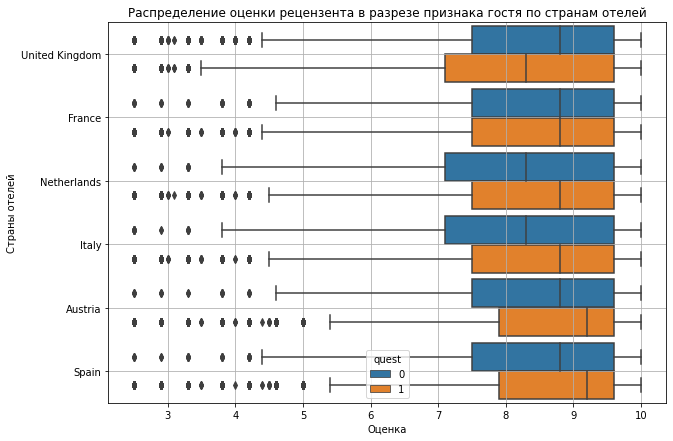

In [17]:
#6 график Распределения оценки рецензента в разрезе признака гостя по странам отелей
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df.loc[df['sample']==1],
    y='hotel_country',
    x='reviewer_score',
    hue='quest',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение оценки рецензента в разрезе признака гостя по странам отелей');
boxplot.set_xlabel('Оценка');
boxplot.set_ylabel('Страны отелей');
boxplot.grid()

*Вывод: Гости Испании, Австрии, Италии и Нидерландов ставят лучшие оценки чем хозяева. А гости Великобритании наиболее разочарованы в отелях, чем хозяева. Во Франции достаточно одинаково оценивают обе группы.*

In [18]:
#7
df['month'] = df['review_date'].dt.month #записываем месяц


#Зависимость оценки рецензента от признаков "hotel_country"-страна отеля и "month"- месяц года оценки рецензентом

filter_zp = df.loc[df['sample']==1].groupby(['hotel_country', 'month'], as_index=False)['reviewer_score'].median()

fig = px.bar(
    data_frame = filter_zp,
    y = 'reviewer_score',
    color = 'hotel_country',
    x = 'month',
    barmode = "group",
    title = 'Зависимость оценки рецензента от признаков "hotel_country" и "month"'
)
fig.show()

*Вывод: В сентябре и октябре наиболее слабые оценки в основном для всех стран. Месяцы не влияют на оценки только в United Kingdom. В основном хорошие оценки ставят в зимние месяцы.*

In [19]:
#8 вычисляем день недели отзыва
df['dayofweek'] = df['review_date'].dt.dayofweek


#Зависимость оценки от признаков "hotel_country"-страна отеля и "dayofweek"-день недели
# ваш код здесь

filter_zp = df.loc[df['sample']==1].groupby(['hotel_country', 'dayofweek'], as_index=False)['reviewer_score'].median()

fig = px.bar(
    data_frame = filter_zp,
    y = 'reviewer_score',
    color = 'hotel_country',
    x = 'dayofweek',
    barmode = "group",
    title = 'Зависимость оценки от признаков "hotel_country" и "dayofweek"'
)
fig.show()

In [20]:
#9 перевод строки days_since_review в целое число
def get_day(arg):
    #разделяем строку и выбираем первое слово
    return int(arg.split()[0])

df['days_since_review'] = df['days_since_review'].apply(get_day)

In [26]:
#10 просмотрев отзывы отбираем отзывы которые не соответсвуют признакам (вручную, в данном моменте дошли до 10 повторов отзывов)
#hotels['positive_review'].value_counts()[450:500]
hotels['negative_review'].value_counts()[600:650]

 size of the room                           11
 room                                       11
 pillows                                    11
 The beds                                   11
 No car park                                11
 Room was cold                              11
 Nothing it was all great                   11
 No elevator                                11
 nothing to complain about                  11
 Pricey                                     11
 Nothing it was all good                    11
 Rooms are a bit small                      11
 Small bathroom                             11
 All was fine                               10
 No comments                                10
 no swimming pool                           10
 Poor breakfast                             10
 Breakfast could be improved                10
 Breakfast was poor                         10
 Anything                                   10
 Room is small                              10
 Spa         

In [27]:
#11 список не позитивных отзывов в positive_review (убираем пробелы и переводим в нижний регистр)
lst_no_positiv = ['nopositive', 'nothing', 'nothingatall', 'na', 'none', 'nothingreally', 'nothingspecial', 'no', 'didnothavebreakfast',
                 'nobreakfast', 'nothinginparticular', 'nocomment'] 

# список не негативных отзывов в negative_review
lst_no_negative = ['nothing', 'nonegative', 'none', 'na', 'allgood', 'nothingreally', 'nocomplaints', 'nil', 'nothingtodislike', 'nothingatall', 'absolutelynothing',
                   'cantthinkofanything', 'everythingwasperfect', 'no', 'everythingwasgreat', 'everythingwasgood', 'nothingtocomplainabout', 'likedeverything', 'non',
                   'allwasgood', 'ilikedeverything', 'nothingtocomplainabout', 'nothingallgood', 'everythingwasfine', 'nothinginparticular', 'therewasnothingididntlike',
                   'nocomplaintsatall', 'nothingeverythingwasgreat', 'nothingitwasperfect', 'noproblems', 'notathing', 'nonegatives', 'nothingcomestomind',
                   'nothingtomention', 'allok', 'likedeverything', 'nothinginparticular', 'nodislikes', 'therewasnothingwedidntlike', 'nocomment', 'nothingididntlike',
                   'nothingeverythingwasperfect', 'nothingicanthinkof', 'nothingtoreport', 'welikedeverything', 'therewasnothingtodislike', 'lovedeverything',
                   'itwasallgood', 'theweather', 'nothingtosay', 'therewasnothingnottolike', 'nothingbad', 'nobadexperience', 'nothingspecial', 'nothingtocomplain',
                   'noissues', 'allgreat', 'likeditall', 'nocomments', 'nothingbadtosay', 'nothingatall', 'nothingwedidntlike', 'thatwecouldntstaylonger',
                   'cantthinkofathing', 'allwasgood', 'nothingcouldhavebeenbetter', 'nothingnegativetosay', 'everythingwasexcellent', 'couldntfaultit',
                   'everythingwasok', 'itwasperfect', 'cannotthinkofanything', 'noproblemsatall', 'nothingcouldhavebeenbetter', 'icantthinkofanything',
                   'allfine', 'goinghome', 'absolutelynothing'] 

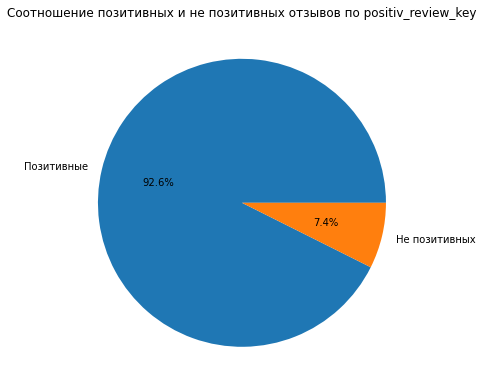

In [28]:
#12 выявление реально позитивных отзывов

def get_positiv(arg):
  arg = arg.replace(' ', '').lower()
  if arg in lst_no_positiv:
    return 0
  else:
    return 1
  
df['positiv_review_key'] = df['positive_review'].apply(get_positiv)


# график Cоотношение реально позитивных и не позитивных отзывов из признака positiv_review_key
exited = df['positiv_review_key'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=['Позитивные', 'Не позитивных'],
    autopct='%.1f%%'
)
axes.set_title('Cоотношение позитивных и не позитивных отзывов по positiv_review_key');

*Вывод: Существенная доля из признака positiv_review является не позитивным отзывом*

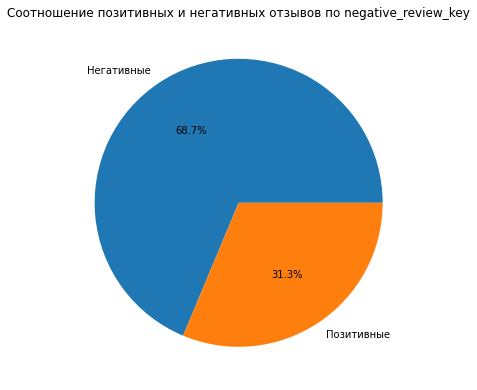

In [29]:
#13 выявление реально негативных отзывов

def get_negative(arg):
  arg = arg.replace(' ', '').lower()
  if arg in lst_no_negative:
    return 0
  else:
    return 1
  
df['negative_review_key'] = df['negative_review'].apply(get_negative)

# график Cоотношение позитивных и реально негативных отзывов из признака negative_review
exited = df['negative_review_key'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=['Негативные', 'Позитивные'],
    autopct='%.1f%%'
)
axes.set_title('Cоотношение позитивных и негативных отзывов по negative_review_key');

*Вывод: Треть отзывов записанных как негативные в negative_review позитивные*

In [31]:
#15 корректировка review_total_negative_word_counts и review_total_positive_word_counts
df['review_total_negative_word_counts'] = df['review_total_negative_word_counts'] * df['negative_review_key']

df['review_total_positive_word_counts'] = df['review_total_positive_word_counts'] * df['positiv_review_key']

In [32]:
#16 ключи для слов в positive_review
def get_review(arg, a1, a2):
  arg = arg.lower().split()
  if a1 in arg or a2 in arg:
    return 1
  else:
    return 0
  
df['breakfast'] = df['positive_review'].apply(get_review, args = ('breakfast', 'food'))
 
df['bathroom'] = df['positive_review'].apply(get_review, args = ('bathroom', 'bath'))
  
df['room'] = df['positive_review'].apply(get_review, args = ('room', 'rooms'))
  
df['clean'] = df['positive_review'].apply(get_review, args = ('cleanliness', 'clean'))


df['parking'] = df['positive_review'].apply(get_review, args = ('parking', 1))
df['location'] = df['positive_review'].apply(get_review, args = ('location', 1))
df['wifi'] = df['positive_review'].apply(get_review, args = ('wifi', 1))
df['pillows'] = df['positive_review'].apply(get_review, args = ('pillows', 1))

df['pool'] = df['positive_review'].apply(get_review, args = ('pool', 1))
df['service'] = df['positive_review'].apply(get_review, args = ('service', 1))
df['bar'] = df['positive_review'].apply(get_review, args = ('bar', 1))
df['shower'] = df['positive_review'].apply(get_review, args = ('shower', 1))
df['facilities'] = df['positive_review'].apply(get_review, args = ('facilities', 1))
df['staff'] = df['positive_review'].apply(get_review, args = ('staff', 1))

def get_review(arg, a1, a2, a3):
  arg = arg.lower().split()
  if a1 in arg or a2 in arg or a3 in arg:
    return 1
  else:
    return 0
  
df['price'] = df['positive_review'].apply(get_review, args = ('price', 'cost', 'overpriced'))

In [33]:
#17 ключи для слов в negative_review
def get_review(arg, a1, a2):
  arg = arg.lower().split()
  if a1 in arg or a2 in arg:
    return 1
  else:
    return 0


df['breakfast_negative'] = df['negative_review'].apply(get_review, args = ('breakfast', 'food'))
 
df['bathroom_negative'] = df['negative_review'].apply(get_review, args = ('bathroom', 'bath'))
  
df['room_negative'] = df['negative_review'].apply(get_review, args = ('room', 'rooms'))
  
df['clean_negative'] = df['negative_review'].apply(get_review, args = ('cleanliness', 'clean'))


df['parking_negative'] = df['negative_review'].apply(get_review, args = ('parking', 1))
df['location_negative'] = df['negative_review'].apply(get_review, args = ('location', 1))
df['wifi_negative'] = df['negative_review'].apply(get_review, args = ('wifi', 1))
df['pillows_negative'] = df['negative_review'].apply(get_review, args = ('pillows', 1))

df['pool_negative'] = df['negative_review'].apply(get_review, args = ('pool', 1))
df['service_negative'] = df['negative_review'].apply(get_review, args = ('service', 1))
df['bar_negative'] = df['negative_review'].apply(get_review, args = ('bar', 1))
df['shower_negative'] = df['negative_review'].apply(get_review, args = ('shower', 1))
df['facilities_negative'] = df['negative_review'].apply(get_review, args = ('facilities', 1))
df['staff_negative'] = df['negative_review'].apply(get_review, args = ('staff', 1))

def get_review(arg, a1, a2, a3):
  arg = arg.lower().split()
  if a1 in arg or a2 in arg or a3 in arg:
    return 1
  else:
    return 0
  
df['price_negative'] = df['negative_review'].apply(get_review, args = ('price', 'cost', 'overpriced'))

In [34]:
#18 оставляем признак negative_review_key как other, в дополнение слов из списка
lst = ['bathroom_negative', 'room_negative', 'parking_negative', 'breakfast_negative', 'location_negative', 'wifi_negative', 'pillows_negative', 'price_negative',
       'pool_negative', 'bar_negative', 'clean_negative', 'service_negative', 'shower_negative', 'facilities_negative', 'staff_negative']
for l in lst:
  df['negative_review_key'] = df['negative_review_key'] + df[l]
  
def get_other(arg):
  if arg!=1:
    return 0
  else:
    return 1

df['negative_review_key'] = df['negative_review_key'].apply(get_other)

In [35]:
#19 оставляем признак positiv_review_key как other, в дополнение слов из списка
lst = ['bathroom', 'room', 'parking', 'breakfast', 'location', 'wifi', 'pillows', 'price', 'pool', 'bar', 'clean', 'service', 'shower', 'facilities', 'staff']
for l in lst:
  df['positiv_review_key'] = df['positiv_review_key'] + df[l]
  
def get_other(arg):
  if arg!=1:
    return 0
  else:
    return 1

df['positiv_review_key'] = df['positiv_review_key'].apply(get_other)

In [36]:
#20 кодируем hotel_country, month, dayofweek

df = pd.get_dummies(df, columns=['hotel_country', 'dayofweek', 'month'])

In [37]:
#21 создаем коллекцию тэгов
from collections import Counter
counter = None
for i in range(df.shape[0]):
  if counter == None:
    counter = Counter(df['tags'][i][3:-3].split(" ', ' "))
  else:
    counter = counter + Counter(df['tags'][i][3:-3].split(" ', ' "))

In [38]:
#22 отбираем из коллекции тэгов 15 популярных и создаем ключи
def get_tag(arg, a1, a2):

  if a1 in arg:
    return 1
  else:
    return 0

for i in range(15):
  tmp = counter.most_common()[i][0]
  df[tmp] = df['tags'].apply(get_tag, args = (tmp, 1))

In [39]:
#23 убираем ненужные признаки и строковые данные, 

df.drop(['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review',# 'average_score',
         'positive_review', 'tags', 'lat', 'lng'], axis=1, inplace=True) 

# теперь выделим тестовую часть
train_data = df.query('sample == 1').drop(['sample'], axis=1)
test_data = df.query('sample == 0').drop(['sample'], axis=1)

# АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ

In [40]:
train_data.columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'days_since_review',
       'reviewer_score', 'quest', 'positiv_review_key', 'negative_review_key',
       'month_average_score', 'breakfast', 'bathroom', 'room', 'clean',
       'parking', 'location', 'wifi', 'pillows', 'pool', 'service', 'bar',
       'shower', 'facilities', 'staff', 'price', 'breakfast_negative',
       'bathroom_negative', 'room_negative', 'clean_negative',
       'parking_negative', 'location_negative', 'wifi_negative',
       'pillows_negative', 'pool_negative', 'service_negative', 'bar_negative',
       'shower_negative', 'facilities_negative', 'staff_negative',
       'price_negative', 'hotel_country_Austria', 'hotel_country_France',
       'hotel_country_Italy', 'hotel_country_Netherlands',
       'hotel_country_Spain', 'hotel_country_Unite

In [49]:
#26
# непрерывные признаки
num_cols = ['additional_number_of_scoring', 'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['positiv_review_key', 'negative_review_key', 'average_score',
       'days_since_review', 'quest', 'breakfast', 'bathroom', 'room',
       'clean', 'parking', 'location', 'wifi', 'pillows', 'pool', 'service',
       'bar', 'shower', 'facilities', 'staff', 'price', 'breakfast_negative',
       'bathroom_negative', 'room_negative', 'clean_negative',
       'parking_negative', 'location_negative', 'wifi_negative',
       'pillows_negative', 'pool_negative', 'service_negative', 'bar_negative',
       'shower_negative', 'facilities_negative', 'staff_negative',
       'price_negative', 'hotel_country_France', 'hotel_country_Austria',
       'hotel_country_Italy', 'hotel_country_Netherlands',
       'hotel_country_Spain', 'hotel_country_United Kingdom', 'dayofweek_0',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'Leisure trip',
       'Submitted from a mobile device', 'Couple', 'Stayed 1 night',
       'Stayed 2 nights', 'Solo traveler', 'Stayed 3 nights', 'Business trip',
       'Group', 'Family with young children', 'Stayed 4 nights', 'Double Room',
       'Standard Double Room', 'Superior Double Room',
       'Family with older children']

In [42]:
#27
#функция постройки диаграммы
def show_corr_heatmap(data, columns_list, title, method):
    """Построения корреляционной диаграммы"""
    fig_, ax_ = plt.subplots(figsize=(18, 15))
    corr = data[columns_list].corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, 
                annot=True, 
                linewidths=0.1, 
                ax=ax_, 
                mask=mask, 
                cmap='viridis',
                fmt='.1g')
    ax_.set_title(title, fontsize=18)
    plt.show()

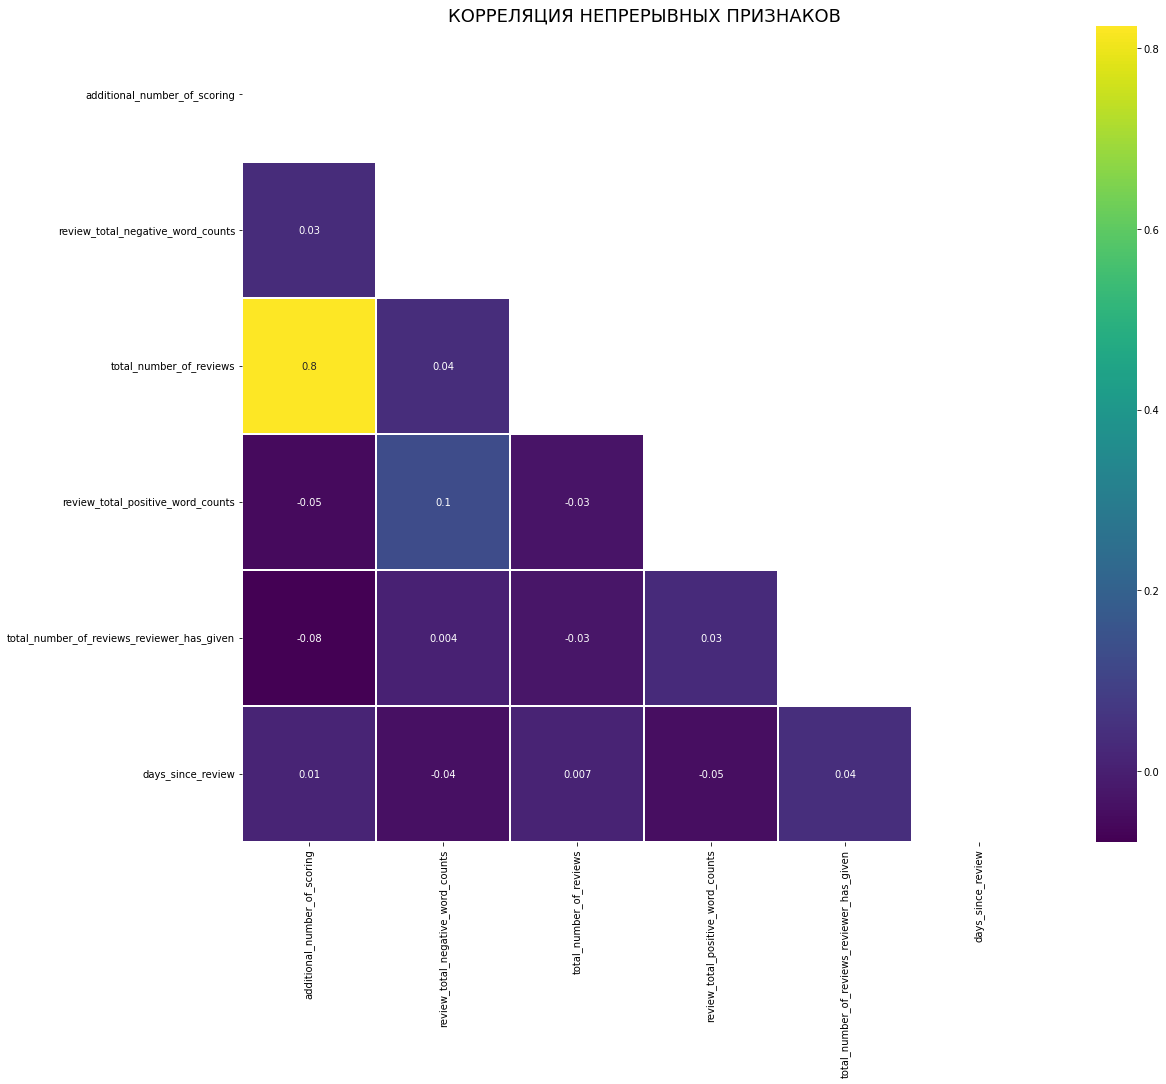

In [49]:
#28
#строим диаграмму для непрерывных признаков:
show_corr_heatmap(train_data, num_cols, 'КОРРЕЛЯЦИЯ НЕПРЕРЫВНЫХ ПРИЗНАКОВ', method='pearson');

*Отбираем на удаление признака из пар имеющих модуль корреляции больше 0.8.
В данном случае total_number_of_reviews, т.к. общее количество действительных отзывов об отеле у нас имеется в виде даты, 
оставим additional_number_of_scoring*

In [43]:
#29
train_data.drop('total_number_of_reviews', axis = 1, inplace=True)

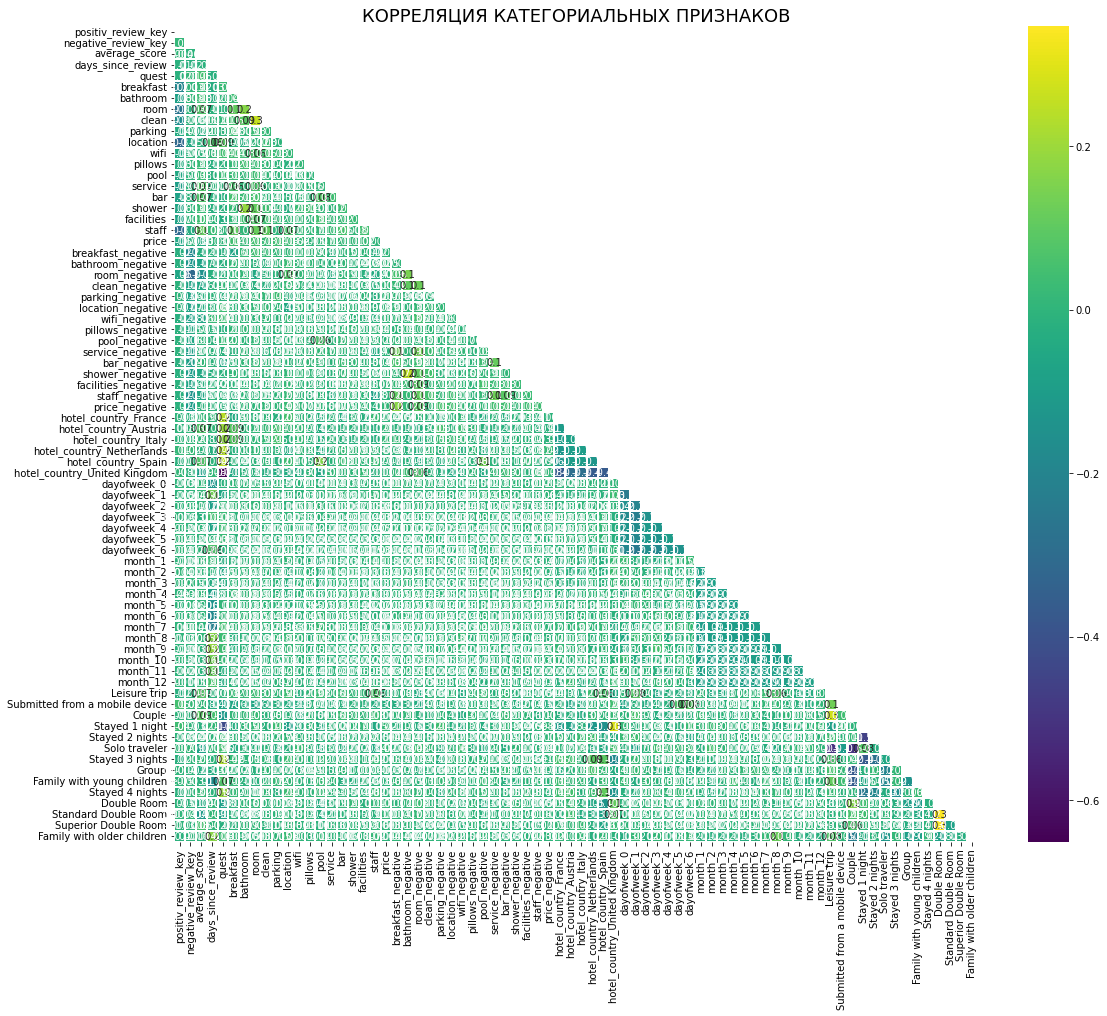

In [50]:
#30 

#строим диаграмму для категориальных признаков:
show_corr_heatmap(train_data, cat_cols, 'КОРРЕЛЯЦИЯ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ', method='spearman');

*Вывод: Leisure trip и Business trip коллинеарны.*

In [47]:
train_data.drop(['Business trip'], axis = 1, inplace=True) 


# Обучение модели

In [52]:
#31
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = train_data.drop(['reviewer_score'], axis = 1)  #, 'days_since_review', 'month_average_score'
y = train_data['reviewer_score'] 

In [53]:
#32 Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [54]:
#33 Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

      
# Обучаем модель на тренировочном наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


In [55]:
y_pred

array([8.747, 9.693, 7.242, ..., 7.148, 8.419, 9.118])

In [56]:
y_test

258138    10.0
506556     9.6
308036     8.8
286479    10.0
425516     9.6
          ... 
179912     7.9
293996    10.0
235092     8.3
299632     8.8
447292     8.8
Name: reviewer_score, Length: 96624, dtype: float64

In [106]:
#34 Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
#print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))
#print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8706933500462267


In [57]:
# сравниваем предсказанные значения (y_pred) с реальными (y_test), 
# метрика Mean Absolute Percentage Error (MAPE) показывает среднюю абсолютную 
# процентную ошибку предсказанных значений от фактических:

def mean_absolute_percentage_error(y_tr, y_pr):
    """Получение средней абсолютной ошибки"""
    y_tr, y_pr = np.array(y_tr), np.array(y_pr)
    return np.mean(np.abs((y_tr - y_pr) / y_tr)) * 100

print('MAPE:', round(mean_absolute_percentage_error(y_test, y_pred), 2))



MAPE: 12.91


<AxesSubplot:>

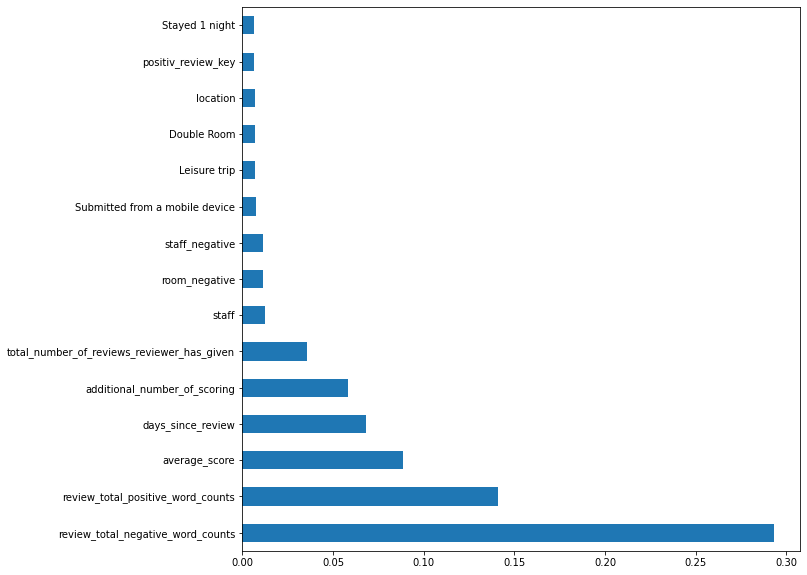

In [58]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [59]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,reviewer_score,quest,positiv_review_key,...,Solo traveler,Stayed 3 nights,Business trip,Group,Family with young children,Stayed 4 nights,Double Room,Standard Double Room,Superior Double Room,Family with older children
116250,171,8.2,53,2541,39,25,59,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
88905,65,8.1,7,1225,0,11,667,0.0,1,0,...,0,0,0,1,0,0,1,0,1,0
26016,167,8.6,0,1594,2,2,550,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
78210,371,7.3,61,2215,9,1,170,0.0,0,1,...,1,0,0,0,0,0,1,0,0,0
3466,369,6.4,41,2275,4,5,378,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1
49549,122,8.9,0,858,2,1,690,0.0,1,1,...,0,1,0,1,0,0,0,0,0,0
114474,832,9.1,0,4672,12,11,143,0.0,1,0,...,1,0,1,0,0,0,1,0,0,0
7561,832,9.1,66,4672,151,16,58,0.0,1,0,...,0,0,0,0,0,1,1,0,0,0
52046,161,8.6,0,1090,6,5,688,0.0,1,0,...,1,1,0,0,0,0,1,0,0,0
9201,241,8.6,8,1477,19,7,160,0.0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [60]:
test_data = test_data.drop(['reviewer_score', 'total_number_of_reviews', 'Business trip'], axis=1)

In [61]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [64]:
predict_submission = regr.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.7s finished


In [65]:
predict_submission

array([8.801, 7.48 , 8.077, ..., 8.273, 9.474, 6.869])

In [66]:
list(sample_submission)

['reviewer_score', 'id']

In [67]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.801,488440
1,7.480,274649
2,8.077,374688
3,9.415,404352
4,9.429,451596
5,8.353,302161
6,8.415,317079
7,7.655,13963
8,8.907,159785
9,7.519,195089


Выводы: Из 18 исходных признаков для построения модели было применено пять. Остальные - это признаки, сконструированные в процессе исследования данных. Критерий MAPE равно значению 12,91. В ряду важнейших признаков есть: общее количество слов в положительном отзыве, общее количество слов в отрицательном отзыве, дополнительные оценки без отзывов, средняя оценка отеля, продолжительность между датой проверки и датой очистки и количество отзывов, которые рецензенты дали в прошлом. В основном сконструированные признаки пошли на подгонку, корректировку, значений оценок.
В дальнейшем можно сконструировать признаки из широты отеля и долготы отеля. Или обучить модель, использовав  продолжительность между датой проверки и датой очистки, как временную последовательность. Также можно использовать продвинутые методы обработки текста для признаков 'negative_review', и 'positive_review'.